# Linear Regression from Scratch!

## Model Building

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [19]:
class LinearRegression:
    
    # Initialize the linear regression model with learning rate and number of iterations
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    # Fit the linear regression model to the training data   
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Perform gradient descent in LOOP for the specified number of iterations
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Update weights and bias using the gradients and learning rate
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
            
    # Predict target values for new input data
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

## Code Interpretation & Notes for Model Building 
#### (AssemblyAI, 2022)
#### Defining the model parameters (lr stands for linear regression)
    def __init__(self, lr = 0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

The description and calculation of each component is available in my transcript. The parameters lr (learning rate, default value 0.001) and n_iters (number of iterations, default 1000) are set to control the optimization process. The variables self.weights and self.bias are initialized as None and will later store the model’s parameters (weights for input features and bias/intercept term). This setup prepares the class to learn these parameters during training (AssemblyAI, 2022).

#### Fitting the model
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # This is the part where the weight and bias are optimized (Details can be found in my transcript)
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

This process is the optimization step in linear regression using gradient descent. The detail of the process can be found in my transcript. In short, it initializes the weights and bias as zero and iteratively adjusts them to minimize the Mean Squared Error (MSE) between predicted (y_pred) and actual values (y). In each iteration, the model calculates predictions (y_pred) using the current weights and bias, computes the gradients (dw and db) of the loss function with respect to the weights and bias, and updates these parameters using the learning rate (lr). This iterative process continues for n_iters iterations, gradually refining the weights and bias to improve the model’s fit.


#### Predicting using the multiple linear regression.
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

The predict function generates predictions for new data points using the trained linear regression model. It calculates the predicted values (y_pred) by taking the dot product of the input features (X) with the learned weights (self.weights) and adding the learned bias (self.bias). The result is returned as the output, representing the model’s predictions based on the input data.

## Linear Model Prediction (70/20/10 Split)

Mean Squared Error (Test Set): 3033.7961698797367
R-squared (Test Set): -0.01568066630424436
F-statistic: -0.38596447743023277
Residual Standard Error: 57.24071857926066

Statsmodels Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     4.780
Date:                Mon, 16 Dec 2024   Prob (F-statistic):             0.0299
Time:                        20:20:59   Log-Likelihood:                -1192.5
No. Observations:                 210   AIC:                             2389.
Df Residuals:                     208   BIC:                             2396.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 c

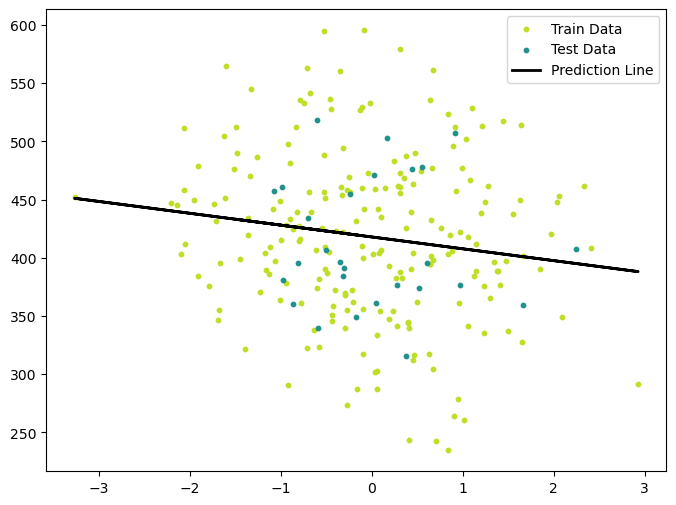

In [23]:
# Step 1: Load data and filter numeric columns
df = pd.read_csv("PISA2018_data.csv") 
numeric_df = df.select_dtypes(include=[np.number])  

# Step 2: Drop rows with NaN values
numeric_df = numeric_df.dropna()

# Step 3: Define Y (target) and X (features)
y = numeric_df['STU_SCI_LITERACY'].values  # Target variable
X = numeric_df[['HOUSE_POS']].values  # Replace with the desired feature

# Step 4: Scale the feature
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 5: Allocate 70/20/10 split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

# Step 6: Train the linear regression model
reg = LinearRegression(lr=0.01)
reg.fit(X_train, y_train)

# Step 7: Predict and calculate MSE for the test set
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

predictions = reg.predict(X_test)
mse_value = mse(y_test, predictions)
print(f"Mean Squared Error (Test Set): {mse_value}")

# Step 8: Manual calculations for R², F-statistic, Residual Standard Error
# Calculate residuals
residuals = y_test - predictions

# R² (R-squared)
def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

r2 = r_squared(y_test, predictions)
print(f"R-squared (Test Set): {r2}")

# F-statistic
def f_statistic(y_true, y_pred, num_predictors):
    n = len(y_true)
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    ss_regression = ss_total - ss_residual
    ms_regression = ss_regression / num_predictors
    ms_residual = ss_residual / (n - num_predictors - 1)
    return ms_regression / ms_residual

num_predictors = X_train.shape[1]
f_stat = f_statistic(y_test, predictions, num_predictors)
print(f"F-statistic: {f_stat}")

# Residual Standard Error (RSE)
def residual_standard_error(y_true, y_pred, num_predictors):
    n = len(y_true)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return np.sqrt(ss_residual / (n - num_predictors - 1))

rse = residual_standard_error(y_test, predictions, num_predictors)
print(f"Residual Standard Error: {rse}")

# Step 9: Using statsmodels for comparisons between manual calculation and the existing model
# Add constant (intercept) to the features (Gradient descent does not need this process)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the model using statsmodels
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# Print statsmodels summary
print("\nStatsmodels Summary:")
print(results.summary())

# Step 10: Optional Visualization (if there is only 1 feature)
if X.shape[1] == 1:  # Only if there is 1 feature
    y_pred_line = reg.predict(X)
    cmap = plt.get_cmap('viridis')
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(X_train, y_train, color=cmap(0.9), s=10, label="Train Data")
    plt.scatter(X_test, y_test, color=cmap(0.5), s=10, label="Test Data")
    plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction Line')
    plt.legend()
    plt.show()

## Prediction Model Interpretation and Notes
#### Step 1: Load data and filter numeric columns
    df = pd.read_csv("PISA2018_data.csv") 
    numeric_df = df.select_dtypes(include=[np.number])

I removed all the categorical variables from the dataset because multiple linear regression only works with numeric variables. I named the dataset containing only numeric variables "numeric_df" to distinguish it from the original data ("df") (Numpy, 2024; Pandas, 2024).

#### Step 2: Drop rows with NaN values
    numeric_df = numeric_df.dropna()

The model returned NaN for MAE value, even though the original dataset had no missing values. Therefore, I removed the rows containing any NaN values for unknown reasons. Please note that using this correction method to handle NaN values is not ideal and not recommended, and I wouldn’t have used it if it weren’t part of a practice exercise for building a machine-learning model. I'd recommend properly handling missing values to anyone building their custom machine-learning models for research.

#### Step 3: Define Y (Outcome) and X (Predictors)
    y = numeric_df['STU_SCI_LITERACY'].values  
    X = numeric_df[['HOUSE_POS']].values  # Replace with the desired feature

This code sets up the variables X and y for your study. X can include several items, but it must exclude the y variable. 

#### Step 4: Scale the feature
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

This code standardizes variables to allow comparisons by bringing values with different units to the same scale. StandardScaler (scikit-learn, 2024a) is a function under sklearn.preprocessing (import StandardScaler).


#### Step 5: Allocate 70/20/10 split
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

This code divides the dataset roughly into training 70% / validation 20% / testing 10%. These settings ensure we use new subsets of samples within the numeric_df dataset to verify and test the linear regression model. (scikit-learn, 2024b)

#### Step 6: Train the linear regression model
    reg = LinearRegression(lr=0.01)
    reg.fit(X_train, y_train)

This code calls for the Linear Regression model that I previously built based on the video instruction by AssemblyAI (2022). The learning rate (details are available in my transcript) is set to 0.01. In short, a smaller value (e.g., 0.01) ensures slower but more stable learning, while a larger value could lead to faster convergence but lacks accuracy (Bhattbhatt, 2024).

#### Step 7: Predict and calculate MSE for the test set
    def mse(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)
    
    predictions = reg.predict(X_test)
    mse_value = mse(y_test, predictions)
    print(f"Mean Squared Error (Test Set): {mse_value}")

This code calculates the Mean Squared Error (MSE), which measures how far the model’s predictions are from the actual values in the test set (the equation is available in my transcript). (y_true) = the data point in the dataset and (y_pred) = the model's predicted y value. "reg" is predetermined on step 6, and predicts is predetermined in the model building (predict = return np.dot(X, self.weights) + self.bias) (sklearn, 2024).

#### Step 8: Manual calculations for R², F-statistic, Residual Standard Error
    # Calculate residuals
    residuals = y_test - predictions

This calculates the residuals, which are the differences between the actual values (y_test) and the predicted values (predictions) from the model.

#### R² (R-squared)
    def r_squared(y_true, y_pred):
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

    r2 = r_squared(y_test, predictions)
    print(f"R-squared (Test Set): {r2}")

The equation for calculating the R squared is available in my transcript. I used np.mean to calculate the mean values and np.sum to add the squared residual values.

#### F-statistic
    def f_statistic(y_true, y_pred, num_predictors):
        n = len(y_true)
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        ss_regression = ss_total - ss_residual
        ms_regression = ss_regression / num_predictors
        ms_residual = ss_residual / (n - num_predictors - 1)
        return ms_regression / ms_residual

    num_predictors = X_train.shape[1]
    f_stat = f_statistic(y_test, predictions, num_predictors)
    print(f"F-statistic: {f_stat}")

The mathematical equation for F-statistic is available in my transcript. 

#### Residual Standard Error (RSE)
    def residual_standard_error(y_true, y_pred, num_predictors):
        n = len(y_true)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        return np.sqrt(ss_residual / (n - num_predictors - 1))
    
    rse = residual_standard_error(y_test, predictions, num_predictors)
    print(f"Residual Standard Error: {rse}")

The mathematical equations are given in my transcripts. The following metrics helped me determine if my model was functioning correctly. I also wanted to use the conventional Python module "statsmodels (Josef Perktold et al., 2024)" to compare with just to varify the outcome.

#### Step 9: Using statsmodels for comparisons between manual calculation and the existing model (Josef Perktold et al., 2024)
##### Add constant (intercept) to the features (Gradient descent does not need this process)
    X_train_sm = sm.add_constant(X_train)
    X_test_sm = sm.add_constant(X_test)

##### Fit the model using statsmodels
    model = sm.OLS(y_train, X_train_sm)
    results = model.fit()

##### Print statsmodels summary
    print("\nStatsmodels Summary:")
    print(results.summary())

The module required the intercept values for training and testing (Josef Perktold et al., 2024). This block code is only required when the statsmodels module is used. 


#### Step 10: Optional Visualization (if there is only 1 feature)
    if X.shape[1] == 1:  # Only if there is 1 feature
        y_pred_line = reg.predict(X)
        cmap = plt.get_cmap('viridis')
        fig = plt.figure(figsize=(8, 6))
        plt.scatter(X_train, y_train, color=cmap(0.9), s=10, label="Train Data")
        plt.scatter(X_test, y_test, color=cmap(0.5), s=10, label="Test Data")
        plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction Line')
        plt.legend()
        plt.show()

Matplotlib is a simple and straightforward tool for creating visualizations, and I could easily spend hours learning about it. I picked the easiest sample based on online cheetsheet and handouts (Matplotlib, 2024). Visualizing data is so important in analysis that I would have spent more time on it if I had the chance.

## References
AssemblyAI (Director). (2022, September 12). Machine Learning From Scratch Full course [Video recording]. https://www.youtube.com/watch?v=p1hGz0w_OCo

Bhattbhatt, V. (2024, February 16). Learning Rate and Its Strategies in Neural Network Training. The Deep Hub. https://medium.com/thedeephub/learning-rate-and-its-strategies-in-neural-network-training-270a91ea0e5c

Josef Perktold, Skipper Seabold, Kevin Sheppard, ChadFulton, Kerby Shedden, jbrockmendel, j-grana6, Peter Quackenbush, Vincent Arel-Bundock, Wes McKinney, Ian Langmore, Bart Baker, Ralf Gommers, yogabonito, s-scherrer, Yauhen Zhurko, Matthew Brett, Enrico Giampieri, yl565, … Yaroslav Halchenko. (2024). statsmodels/statsmodels: Release 0.14.2 (Version v0.14.2) [Computer software]. Zenodo. https://doi.org/10.5281/ZENODO.593847

Matplotlib. (2024). Matplotlib cheatsheets—Visualization with Python. Matplotlib Cheatsheets and Handouts. https://matplotlib.org/cheatsheets/

Numpy. (2024). NumPy user guide—NumPy v2.1 Manual [NumPy user guide]. Numpy. https://numpy.org/doc/stable/user/index.html#user

Pandas. (2024). pandas.DataFrame.select_dtypes—Pandas 2.2.3 documentation. API Reference > DataFramepandas > pandasDataFrame (Pandas.DataFrame.Select_dtypes). https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

scikit-learn. (2024a). StandardScaler. Scikit-Learn. https://scikit-learn/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

scikit-learn. (2024b). Train_test_split. Train_test_split. https://scikit-learn/stable/modules/generated/sklearn.model_selection.train_test_split.html

sklearn. (2024). Mean_squared_error. Mean_squared_error. https://scikit-learn/stable/modules/generated/sklearn.metrics.mean_squared_error.html
